In [1]:
basedir = '/home/abhinavgupta0110/NeuralODEs_ROM_Closure'

import os

is_google_colab = False

### Mount the Google drive if needed

In [2]:
if is_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    
    %pip install quadpy

os.chdir(os.path.join(basedir, 'neuralDDE_ROM_Closure'))

In [3]:
from src.solvers.neuralDDE_with_adjoint import history

import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
os.chdir(basedir)

In [5]:
save_dir = 'Analysis/AD_Eqn_ROM/compare_loss_final_paper'

In [6]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [7]:
class args:
    def __init__(self, model_dir):
        self.model_dir = model_dir

In [8]:
class loss_plot:

    def __init__(self, figsave_dir):
        self.figsave_dir = figsave_dir
        self.fig = plt.figure(figsize=(6, 4), facecolor='white')
        self.ax = self.fig.add_subplot(111)
        self.colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y', 'C0']
        self.ax.cla()
        self.ax.set_title('Training Loss', fontsize=14)
        self.ax.set_xlabel('Epoch', fontsize=14)
        self.ax.set_ylabel('Time-Averaged $L_2$ Error', fontsize=14)
        self.max_epoch = 1
        self.max_loss = 0.0000001
        self.min_loss = 100
        self.itr = 0

    def add_plot_loss(self, model_dir, legend_name):

        loss_history = history(args(model_dir))
        loss_history.read()
        self.max_epoch = max(self.max_epoch, len(loss_history.epoch))
        self.max_loss = max(self.max_loss, max(loss_history.train_loss))
        self.min_loss = min(self.min_loss, min(loss_history.train_loss))
        self.ax.set_xlim(0, self.max_epoch)
        self.ax.set_xlim(0, 200)
        self.ax.set_ylim(self.min_loss, self.max_loss)

        self.ax.semilogy([i for i in range(len(loss_history.epoch))], loss_history.train_loss, self.colors[self.itr % len(self.colors)]+'-', label = legend_name)

        self.ax.legend(loc='best')
        self.itr = self.itr + 1

    def save_plot(self, save_str):
        self.fig.savefig(os.path.join(self.figsave_dir, save_str))

In [9]:
class val_loss_plot:

    def __init__(self, figsave_dir):
        self.figsave_dir = figsave_dir
        self.fig = plt.figure(figsize=(6, 4), facecolor='white')
        self.ax = self.fig.add_subplot(111)
        self.colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y', 'C0']
        self.ax.cla()
        self.ax.set_title('Prediction Loss', fontsize=14)
        self.ax.set_xlabel('Epoch', fontsize=14)
        self.ax.set_ylabel('Time-Averaged $L_2$ Error', fontsize=14)
        self.max_epoch = 1
        self.max_loss = 0.0000001
        self.min_loss = 100
        self.itr = 0

    def add_plot_loss(self, model_dir, legend_name):

        loss_history = history(args(model_dir))
        loss_history.read()
        self.max_epoch = max(self.max_epoch, len(loss_history.epoch))
        self.max_loss = max(self.max_loss, max(loss_history.val_loss))
        self.min_loss = min(self.min_loss, min(loss_history.val_loss))
        self.ax.set_xlim(0, self.max_epoch)
        self.ax.set_xlim(0, 200)
        self.ax.set_ylim(self.min_loss, self.max_loss)

        self.ax.semilogy([i for i in range(len(loss_history.epoch))], loss_history.val_loss, self.colors[self.itr % len(self.colors)]+'-', label = legend_name)

        self.ax.legend(loc='best')
        self.itr = self.itr + 1

    def save_plot(self, save_str):
        self.fig.savefig(os.path.join(self.figsave_dir, save_str))

In [10]:
# model_dirs = ['ROM_nODE_testcase/model_dir_case16', 'ROM_nDistDDE_testcase/model_dir_case47', 'ROM_nDistDDE_testcase/model_dir_case48', 'ROM_nDistDDE_testcase/model_dir_case45', 'ROM_nDistDDE_testcase/model_dir_case49', 'ROM_nDistDDE_testcase/model_dir_case50']

# legend_names = ['nODE', '$\\tau_2 = 0.025$', '$\\tau_2 = 0.075$', '$\\tau_2 = 0.125$', '$\\tau_2 = 0.175$', '$\\tau_2 = 0.250$']

model_dirs = ['ROM_nODE_testcase/model_dir_case16', 'ROM_nDDE_testcase/model_dir_case23', 'ROM_nDistDDE_testcase/model_dir_case49']

legend_names = ['nODE', 'Discrete-nDDE', 'Distributed-nDDE']

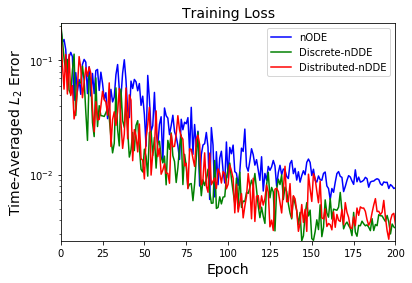

In [11]:
loss_plot_obj = loss_plot(save_dir)

for i in range(len(model_dirs)):
    loss_plot_obj.add_plot_loss(model_dirs[i], legend_names[i])

plt.show()

In [12]:
loss_plot_obj.save_plot('train_loss')

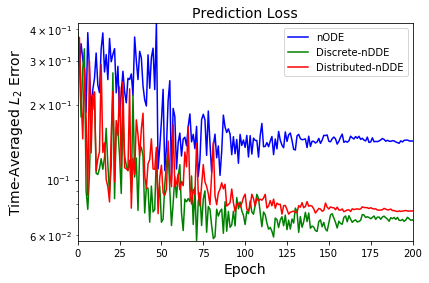

In [13]:
val_loss_plot_obj = val_loss_plot(save_dir)

for i in range(len(model_dirs)):
    val_loss_plot_obj.add_plot_loss(model_dirs[i], legend_names[i])

plt.show()

In [14]:
val_loss_plot_obj.save_plot('val_loss')